<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

# Part.2-1-01 NumPy 陣列的基本操作

# 0. 安裝與載入 NumPy

安裝 NumPy 可以使用 `pip install numpy` 或是 `pip3 install numpy`，在 Anaconda 環境下的話，執行 `conda install numpy` 進行安裝。

In [1]:
# !pip3 install numpy
# !pip3 install matplotlib

載入 NumPy

In [2]:
import numpy as np

目前安裝的 NumPy 版本

In [4]:
np.__version__

'1.19.2'

## 1. 建立 NumPy array (陣列)

### 1.1 `array()` 函式

使用 `array()` 函式，可將 Python list 或元組 (tuple) 的值建立為 NumPy array。

In [5]:
# 使用 list
a = np.array([1, 2, 3, 4, 5])

In [6]:
a

array([1, 2, 3, 4, 5])

In [16]:
test1=np.array((1,23,34))
print(test1)
print(a)

[ 1 23 34]
[1 2 3 4 5]


In [17]:
# 使用元組
b = np.array((6, 7, 8))
print(b)

[6 7 8]


可以看到建立的陣列型別為 numpy.ndarray

In [18]:
type(a), type(b), type(test1)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

下列的語法則會造成錯誤

In [19]:
np.array(1, 2, 3)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

_上面語法錯誤，是因為()中的非list或tuple_

### 1.2 使用 `arange()` 與 `linspace()` 函式產生等差一維陣列

要用序列數字產生陣列元素的話，可以使用 `arange()` 函式，`arange()` 函式引數如下，其中**結束值為必輸，起始值、間隔值非必輸**。產生的序列數字包含起始值但不包含結束值，也就是 `[start, stop)` 的表示方式。

```python
numpy.arange([start, ]stop, [step, ]dtype=None)
```

產生的元素，會是依照起始值、結束值、間隔值做等差的數字序列。

NumPy 陣列支援的資料型別 (dtype) 如下表：

||型別|
|---|---|
|signed整數|int8, int16, int32, int64|
|unsigned整數|uint8, uint16, uint32, uint64|
|浮點數|float16, float32, float64, float128|
|布林值|bool|

_unsigned與signed的定義是符號，其中signed是有分正負號，unsigned則沒有_

In [24]:
# 產生 0 - 9 十個數字元素
print(np.arange(10))
test2=np.arange(20)
print(test2)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [32]:
# 產生 2, 4, 6, 8 數字元素
np.arange(2, 10, 2)
test3=np.arange(3,15,4)
print(test3)

[ 3  7 11]


下例是浮點數序列的示範。

In [33]:
np.arange(1.0, 3.0, 0.5, dtype='float64')

array([1. , 1.5, 2. , 2.5])

當在 `arange()` 使用非整數的間隔值時，有可能會產生不一致的結果，如下例會**有時會包含結束值但有時候不會**。這時候可以考慮使用 `linspace()` 函式。

In [28]:
a = np.arange(0.13, 0.16, step=0.01)
print("沒有包含結束值：", a)
b = np.arange(0.12, 0.16, step=0.01)
print("包含結束值：", b)

沒有包含結束值： [0.13 0.14 0.15]
包含結束值： [0.12 0.13 0.14 0.15 0.16]


跟 `arange()` 的用法很類似，呼叫 `linspace()` 時的引數有啟始值、結束值、資料型別 `dtype`。

與 `arange()` 不同的地方在於**起始跟結束值都是必輸**，產生該範圍內等分的數值，另外對於產生的元素也可以有更多的控制：
- `num`：產生元素數
- `endpoint`:是否包含結束值，_一般預設是True_
- `retstep`：是否要顯示間隔值，**間隔值是依照啟始值、結束值、產生元素數計算而得**，_一般是False_
- `axis`：產生依據的軸

`linspace()` 函式的定義：

```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
```

下面 `linspace()` 的例子跟上面 `arange()` 的例子會有完全相同的產出。
```python
np.arange(2, 10, 2)
```

In [34]:
np.linspace(2, 10, num=4, endpoint=False)

array([2., 4., 6., 8.])

In [35]:
# 顯示間值值
np.linspace(2.0, 3.0, num=5, retstep=True)
# 因為 2 + 4d =3.0, d=0.25

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

### 1.3 建立多維陣列

要建立多維陣列，簡單的理解方式就是陣列中的元素也是陣列，呼叫 `array()` 函式時，只要將 list 中的元素也是 list 傳入即可。下面的例子是建立二維陣列。

In [36]:
a = np.array([[1, 2, 3], [4, 5, 6]])

使用 `print()` 函式可將陣列印出

In [37]:
print(a)

[[1 2 3]
 [4 5 6]]


使用 `shape` 屬性，可以查看多維陣列的形狀。如下例 a 陣列是一個 2 $\times$ 3 的二維陣列。

In [38]:
a.shape

(2, 3)

下列例子是建立三維陣列，也可以理解為 2 個 4 $\times$ 3 的二維陣列排在一起。

In [39]:
b = np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]]])

In [40]:
print(b)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]]


In [41]:
b.shape
#shape 看形狀 呈現為(中括號,幾行,幾個)

(2, 4, 3)

要查看多維陣列的維度數目，可以查看陣列的 `ndim` 屬性。

In [42]:
b.ndim
# 看起來是陣列的個數

3

多維陣列建立時須**注意各維度是否一致**，否則如下例會產生預期之外的結果。

In [43]:
np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6]]])

<ipython-input-43-f231fa882b32>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[[1, 2, 3], [4, 5, 6],


array([list([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]),
       list([[1, 2, 3], [4, 5, 6]])], dtype=object)

### 1.4 `zeros()`、`ones()`、`empty()`

呼叫 `zeros()`、`ones()`函式，可以依照傳入的形狀引數，建立元素全為 0、全為 1 的陣列。

`empty()` 則是不需要給定起始值，但是可以建立給定形狀的陣列，元素值則會隨機給定。

In [9]:
np.zeros((5, 3))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [12]:
np.empty((2, 2, 2))

array([[[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 5.33590898e-321],
        [1.08221785e-312, 8.70018274e-313]]])

### 1.5 使用隨機函式產生陣列的元素

下列是常用的函式及簡介：

|函式|說明|產生數值區間|隨機數資料型別|隨機數分佈|
|---|---|---|---|---|
|rand()|隨機產生指定形狀(shape)的陣列|[0, 1)|浮點數|連續型均勻分布|
|randn()|隨機產生指定形狀(shape)的陣列|(-1, 1)|浮點數|常態分佈|
|randint((low[, high, size, dtype]))|隨機產生設定區間元素|[low, high)|整數|離散型均勻分布|
|random_sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|random([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|randf([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|

**幾乎都不包含結束值**

In [2]:
# 設定隨機種子
np.random.seed(0)

#### 1.5.1 隨機產生指定形狀的陣列

In [8]:
np.random.rand(2, 3)
# rand's range is [0,1) 連續型均勻分布

array([[0.61209572, 0.616934  , 0.94374808],
       [0.6818203 , 0.3595079 , 0.43703195]])

In [16]:
np.random.randn(2, 3)
# randn's range is (-1,1) 常態分布
test4= np.random.randn(2,3,4)
print(test4)

[[[-0.475776    1.44073112 -1.14907568  0.80571455]
  [ 1.75610703  0.97297991 -1.55111911  0.19114348]
  [ 1.60477607 -1.42002593 -2.44378268 -2.05633855]]

 [[-0.99225755  1.01128532  1.40044008 -0.65499168]
  [-0.25579069 -0.71438561 -0.50083877  0.05564534]
  [-0.48896178 -0.37992245  0.25973465 -1.68134864]]]


#### 1.5.2 隨機產生一維陣列的元素

In [11]:
np.random.random(10)
# random([size]): range is [0.0 , 1.0)

array([0.46631077, 0.24442559, 0.15896958, 0.11037514, 0.65632959,
       0.13818295, 0.19658236, 0.36872517, 0.82099323, 0.09710128])

In [13]:
np.random.randint(1, 10, 10)
# randint 顧名思義，"隨機""整數"

array([3, 8, 3, 3, 4, 4, 3, 4, 5, 2])

In [15]:
np.random.random_sample(10)

array([0.39782075, 0.55282148, 0.16494046, 0.36980809, 0.14644176,
       0.56961841, 0.70373728, 0.28847644, 0.43328806, 0.75610669])

In [29]:
# np.random.choice(100, 10)
# choice看似是從100中，隨機選取10個，可重複
test5 = np.random.choice(10,3)
print(test5)

[0 8 1]


### 1.6 隨機產生不同分佈的陣列元素

隨機陣列也可以產生不同分佈的元素，NumPy 提供的函式和分佈非常豐富，所有函式與詳細說明可以參考官方文件 [Random sampling - Distributions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions)。

以 Gamma 分佈為例。

【註】若尚未安裝 Matplotlib 及 SciPy 的話，執行下面範例前請先安裝。

_看不懂_...

In [3]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

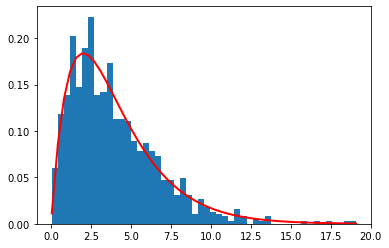

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.special as sps

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

## 2. NumPy陣列的索引和切片 (Slicing)

透過索引存取陣列元素或**進行切片 (slicing)**，可以使用索引值，或是 [start:stop:step] 語法取得範圍內的元素，要留意的是**起始-結束範圍仍是 half-open 的，所以回傳的元素將不包含結束索引的元素**。

In [7]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
a[0]

0

In [13]:
a[5:10] #不包含結束索引的元素

array([5, 6, 7, 8, 9])

In [14]:
a[5:10:2]

array([5, 7, 9])

索引 -1 表示取得最後一個元素。

In [15]:
a[-1]

19

切片如果只有給定 step 值為 -1 的話，則代表是反向取出，元素值是從最後一筆開始取出。

In [16]:
a[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

多維陣列的索引是分別給定**各維度的索引值或範圍。**

In [18]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
b1=b[0, 2] # 這裡表示 第0個矩陣中第2個索引值
b2=b[1,1] # 應該會取出 5
print(b1,b2)

3 5


若沒有給定 start 或 stop 值的話則代表是取出該索引之前或之後的所有元素。若 start 和 stop 值都沒有給定的話，就是取出所有元素值。

In [40]:
b3=b[:, 1:]
# 此表示逗號前為 取出所有的 維度，所以兩個維度都會取
# 而逗號後面為每個維度從 index[1]開始取到結束
b4=b[:,:-1] # 後面意思是取到 -1值
print(b3)
print(b4)
b4=b[:,-1::-1] # 到著取回來
print(b4)
print(b4.ndim)

[[2 3]
 [5 6]]
[[1 2]
 [4 5]]
[[3 2 1]
 [6 5 4]]
2


## 3. NumPy 陣列的常用屬性

|屬性|說明|
|---|---|
|shape|陣列的形狀|
|ndim|陣列的維度數目，也就是軸(axis)的數目|
|dtype|陣列元素的資料型別|
|size|陣列元素的數目|
|flat|陣列的一維迭代器|
|T|陣列轉置|
|real|陣列元素複數(complex number)的實數部分|
|imag|陣列元素複數(complex number)的虚數部分|
|data|顯示buffer物件，指向陣列資料的開始位址|
|itemsize|每個元素的記憶體使用量|
|nbytes|陣列所有元素的記憶體使用量|
|strides|往相郼元素移動時需要的byte數|

a 陣列為二維陣列，陣列形狀、維度、元素數目可透過屬性查看。

In [43]:
a = np.array([[1, 2, 3, 4, 5],
              [4, 5, 6, 7, 8]])

In [44]:
a.shape

(2, 5)

In [45]:
a.ndim

2

In [46]:
a.dtype

dtype('int32')

In [47]:
a.size

10

若將 a 陣列透過一維迭代器來查看的話，索引 6 的元素值將是 5。  
_flat是將整個維度都攤平成一個維度，依據此例子來說flat會變成一個[1,2,3,4,5,4,5,6,7,8]_

In [53]:
# a.flat[6] -> 5
a.flat[9] # 8

8

轉置 (transpose) 陣列，將會在後續線性代數的單元有更多的介紹。

In [54]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7],
       [5, 8]])

x 陣列的元素為複數 (complex number)，查看 `real` 與 `imag` 屬性分別顯示數字的實部與虚部。

In [55]:
x = np.array([1+0j, 0+1j])
x

array([1.+0.j, 0.+1.j])

In [58]:
x.real
# 實根

array([1., 0.])

In [59]:
x.imag
# 虛根

array([0., 1.])

In [60]:
# 顯示buffer物件，指向陣列資料的開始位址
x.data

b 陣列的資料型別為 `int64` 64 bit 的整數，也就是 8 byte，陣列有 3 個元素所以陣列的 `dtype`、`itemsize`、`nbytes`、`strides` 元範及結果如下。

In [61]:
b = np.array([1, 2, 3])

In [63]:
b.dtype # 陣列元素的資料型態

dtype('int32')

In [64]:
b.itemsize # 每個元素的記憶體使用量

4

In [66]:
b.nbytes # 陣列所有元素的總記憶體使用量

12

In [67]:
b.strides # 往相鄰元素移動所需要的byte數

(4,)